In [1]:
%cd ../..

d:\Johan\repositorios\comparacion-cnn-clasico-cuantico


# Exploración de datos

## Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
from python.metadata.path import Path
from python.feature_engineering.utils.exploratory import plot_images_from_path
from python.feature_engineering.utils.exploratory import show_random_image
from python.feature_engineering.utils.exploratory import plot_label_distribution
from python.feature_engineering.utils.exploratory import analyze_image_statistics
from python.feature_engineering.utils.exploratory import check_image_quality
from python.feature_engineering.utils.exploratory import images_to_pixel_vectors
from python.feature_engineering.utils.exploratory import apply_pca
from python.feature_engineering.utils.exploratory import apply_tsne

## Entendimiento del Conjunto de Datos

In [4]:
train_df = pd.read_csv(Path.train_binary)
test_df = pd.read_csv(Path.test_binary)

In [5]:
train = pd.read_csv(Path.train)
test = pd.read_csv(Path.test)
val = pd.read_csv(Path.val)

In [6]:
print(f'El tamaño del dataset es: {train.shape}')
print(f'El tamaño del dataset es: {test.shape}')
print(f'El tamaño del dataset es: {val.shape}')

El tamaño del dataset es: (28292, 2)
El tamaño del dataset es: (8842, 2)
El tamaño del dataset es: (7074, 2)


In [7]:
portrait_df = pd.concat([train_df, test_df])

In [8]:
portrait_df.head()

,x:image,y:label
0,.\other\007720.png,0
1,.\portrait\10575.png,1
2,.\other\flower_0122.png,0
3,.\portrait\09197.png,1
4,.\portrait\07845.png,1


In [9]:
print(f'El tamaño del dataset es: {portrait_df.shape}')
print(f'El tamaño del dataset de entrenamiento es: {train_df.shape}')
print(f'El tamaño del dataset de prueba es: {test_df.shape}')

El tamaño del dataset es: (44208, 2)
El tamaño del dataset de entrenamiento es: (35366, 2)
El tamaño del dataset de prueba es: (8842, 2)


In [10]:
data = pd.concat([train, test, val])

In [11]:
data.shape

(44208, 2)

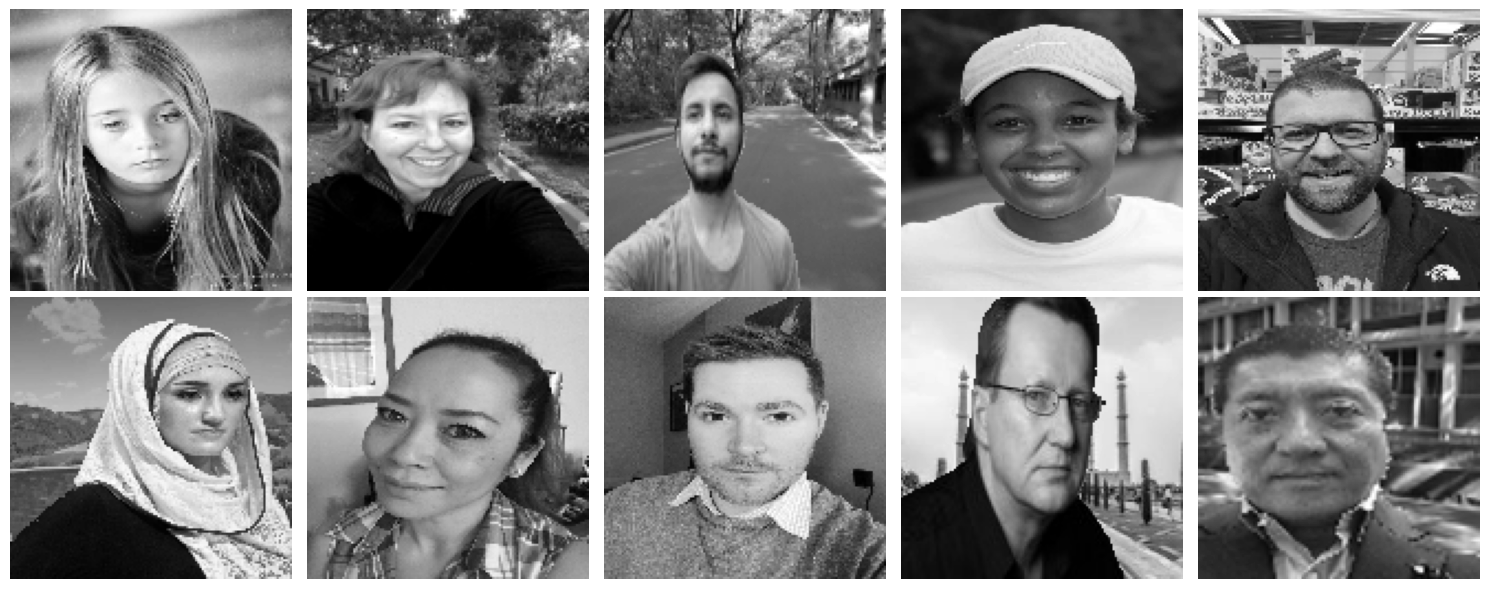

In [12]:
plot_images_from_path(
    path=Path.portrait, 
    save_path=Path.images_grid_portrait,
)

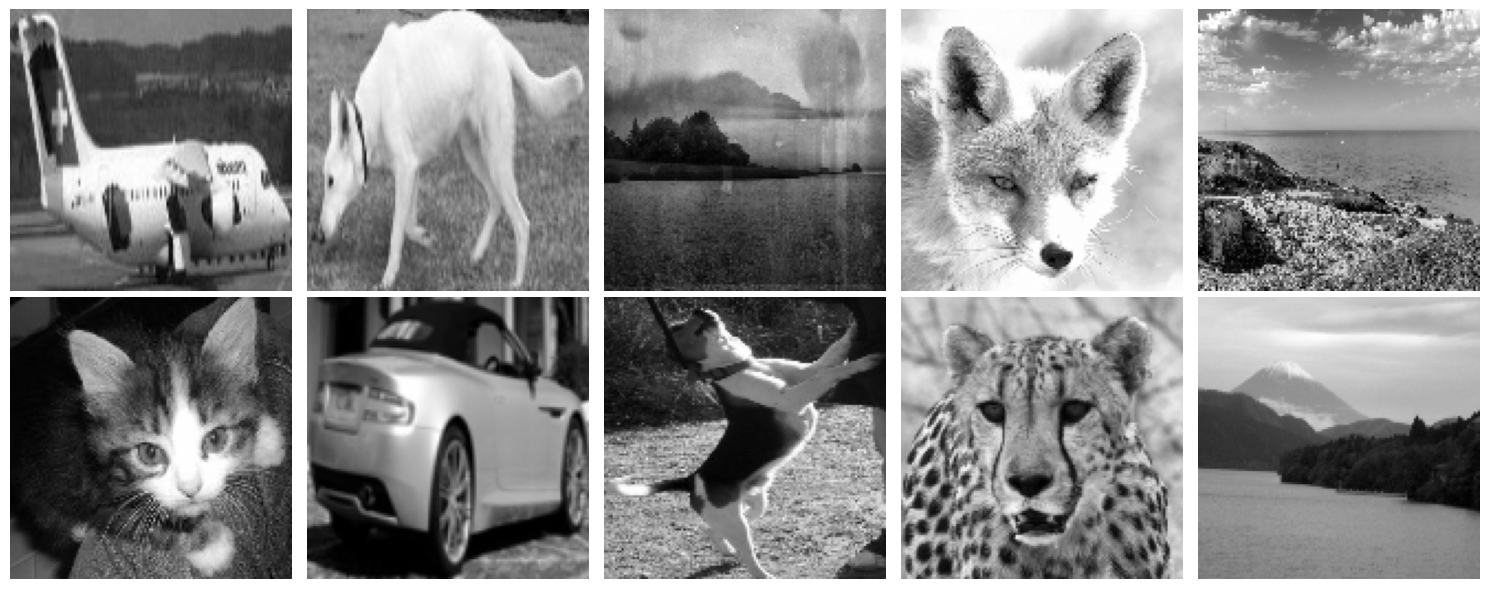

In [13]:
plot_images_from_path(
    path=Path.other, 
    save_path=Path.images_grid_other,
)

(128, 128)


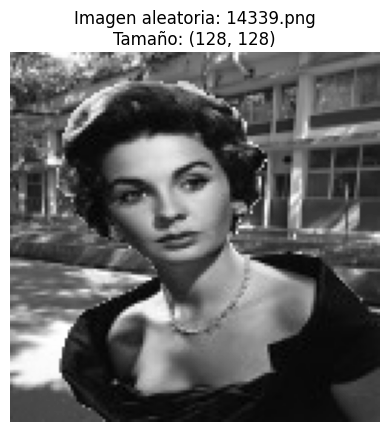

In [14]:
show_random_image(Path.portrait)

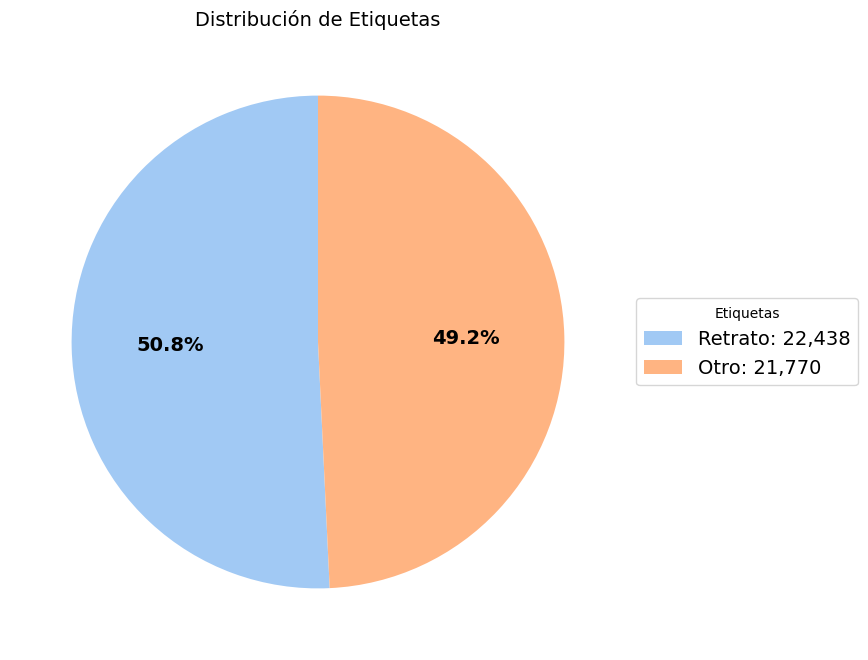

In [15]:
plot_label_distribution(portrait_df, 'y:label', save_path=Path.label_distribution)

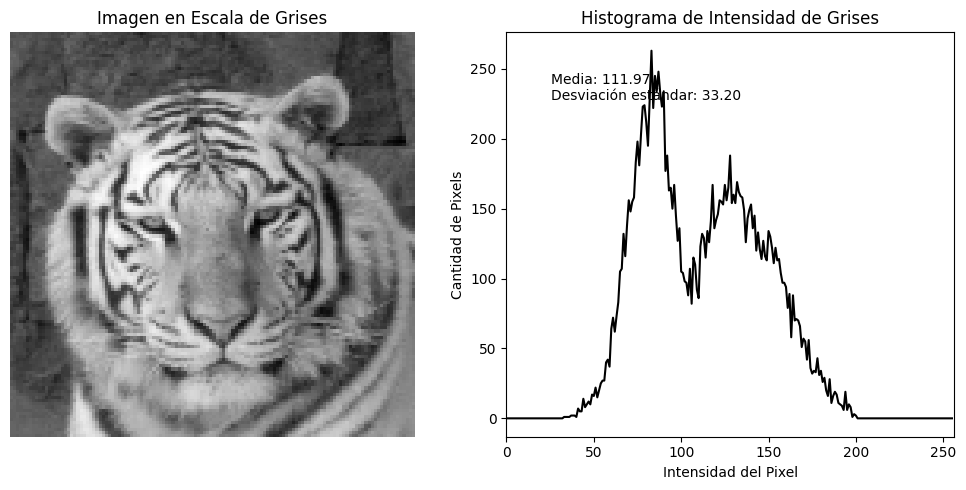

Estadísticas de brillo para output\binary\other\pixabay_wild_000917.png:
Media: 111.97, Desviación estándar: 33.20



In [16]:
analyze_image_statistics(random.choice(data['path'].tolist()), save_path=Path.intensities)

In [17]:
# check_image_quality(data['path'])

In [18]:
pixel_vectors = images_to_pixel_vectors(data['path'])

In [19]:
pixel_vectors = pd.DataFrame(
    pixel_vectors, columns=[f'comp_{i}' for i in range(16384)]
)

In [20]:
pixel_vectors['label'] = data['label'].values

In [21]:
pixel_vectors.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,...,comp_16375,comp_16376,comp_16377,comp_16378,comp_16379,comp_16380,comp_16381,comp_16382,comp_16383,label
0,49,23,37,45,45,38,24,32,16,83,...,212,208,207,205,205,207,200,202,189,1
1,122,121,123,114,109,107,106,100,105,100,...,121,121,123,117,87,54,56,58,57,1
2,253,253,253,254,254,254,254,254,255,254,...,255,255,255,255,255,255,255,255,255,0
3,245,245,245,245,244,244,244,248,251,241,...,65,73,84,139,69,36,101,102,84,0
4,111,105,115,124,40,29,30,31,40,86,...,24,24,24,24,24,24,24,24,24,1


In [22]:
pixel_vectors.to_parquet(Path.pixel_df, index=False)

In [7]:
pixel_vectors = pd.read_parquet(Path.pixel_df)

In [8]:
pixel_vectors.shape

(44208, 16385)

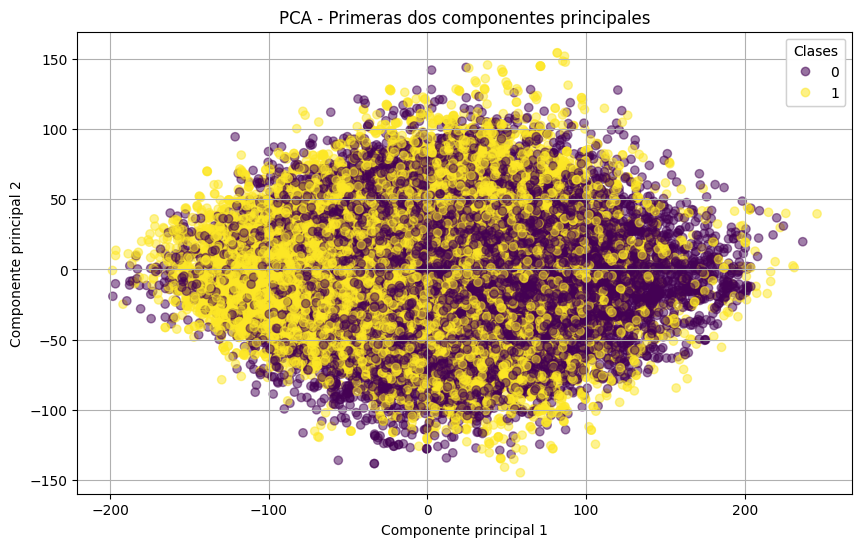

In [6]:
apply_pca(pixel_vectors, save_path=Path.pca)

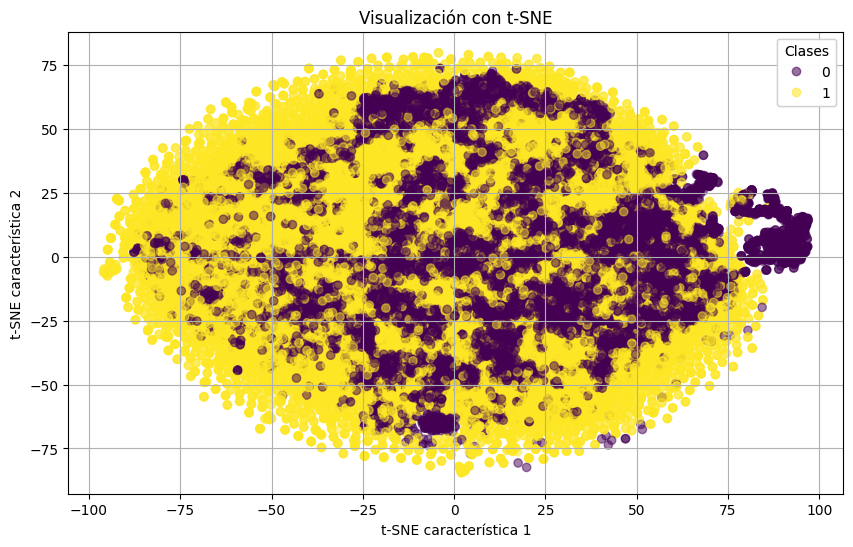

In [10]:
apply_tsne(pixel_vectors, save_path=Path.pca)